### Mussel detection and counting in seabed

In [1]:
!pip install ultralytics==8.0.196

import os
import ultralytics
from ultralytics import YOLO
import glob
from IPython.display import Image, display

HOME = os.getcwd()
print(HOME)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 12.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

## YOLOv8


## Mussel Model Training

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="TyrceGcA8EZtyajwsEVO")
project = rf.workspace("test-redns").project("test1-pvruw")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [3]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 194MB/s]
New https://pypi.org/project/ultralytics/8.1.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/test1-3/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, lin

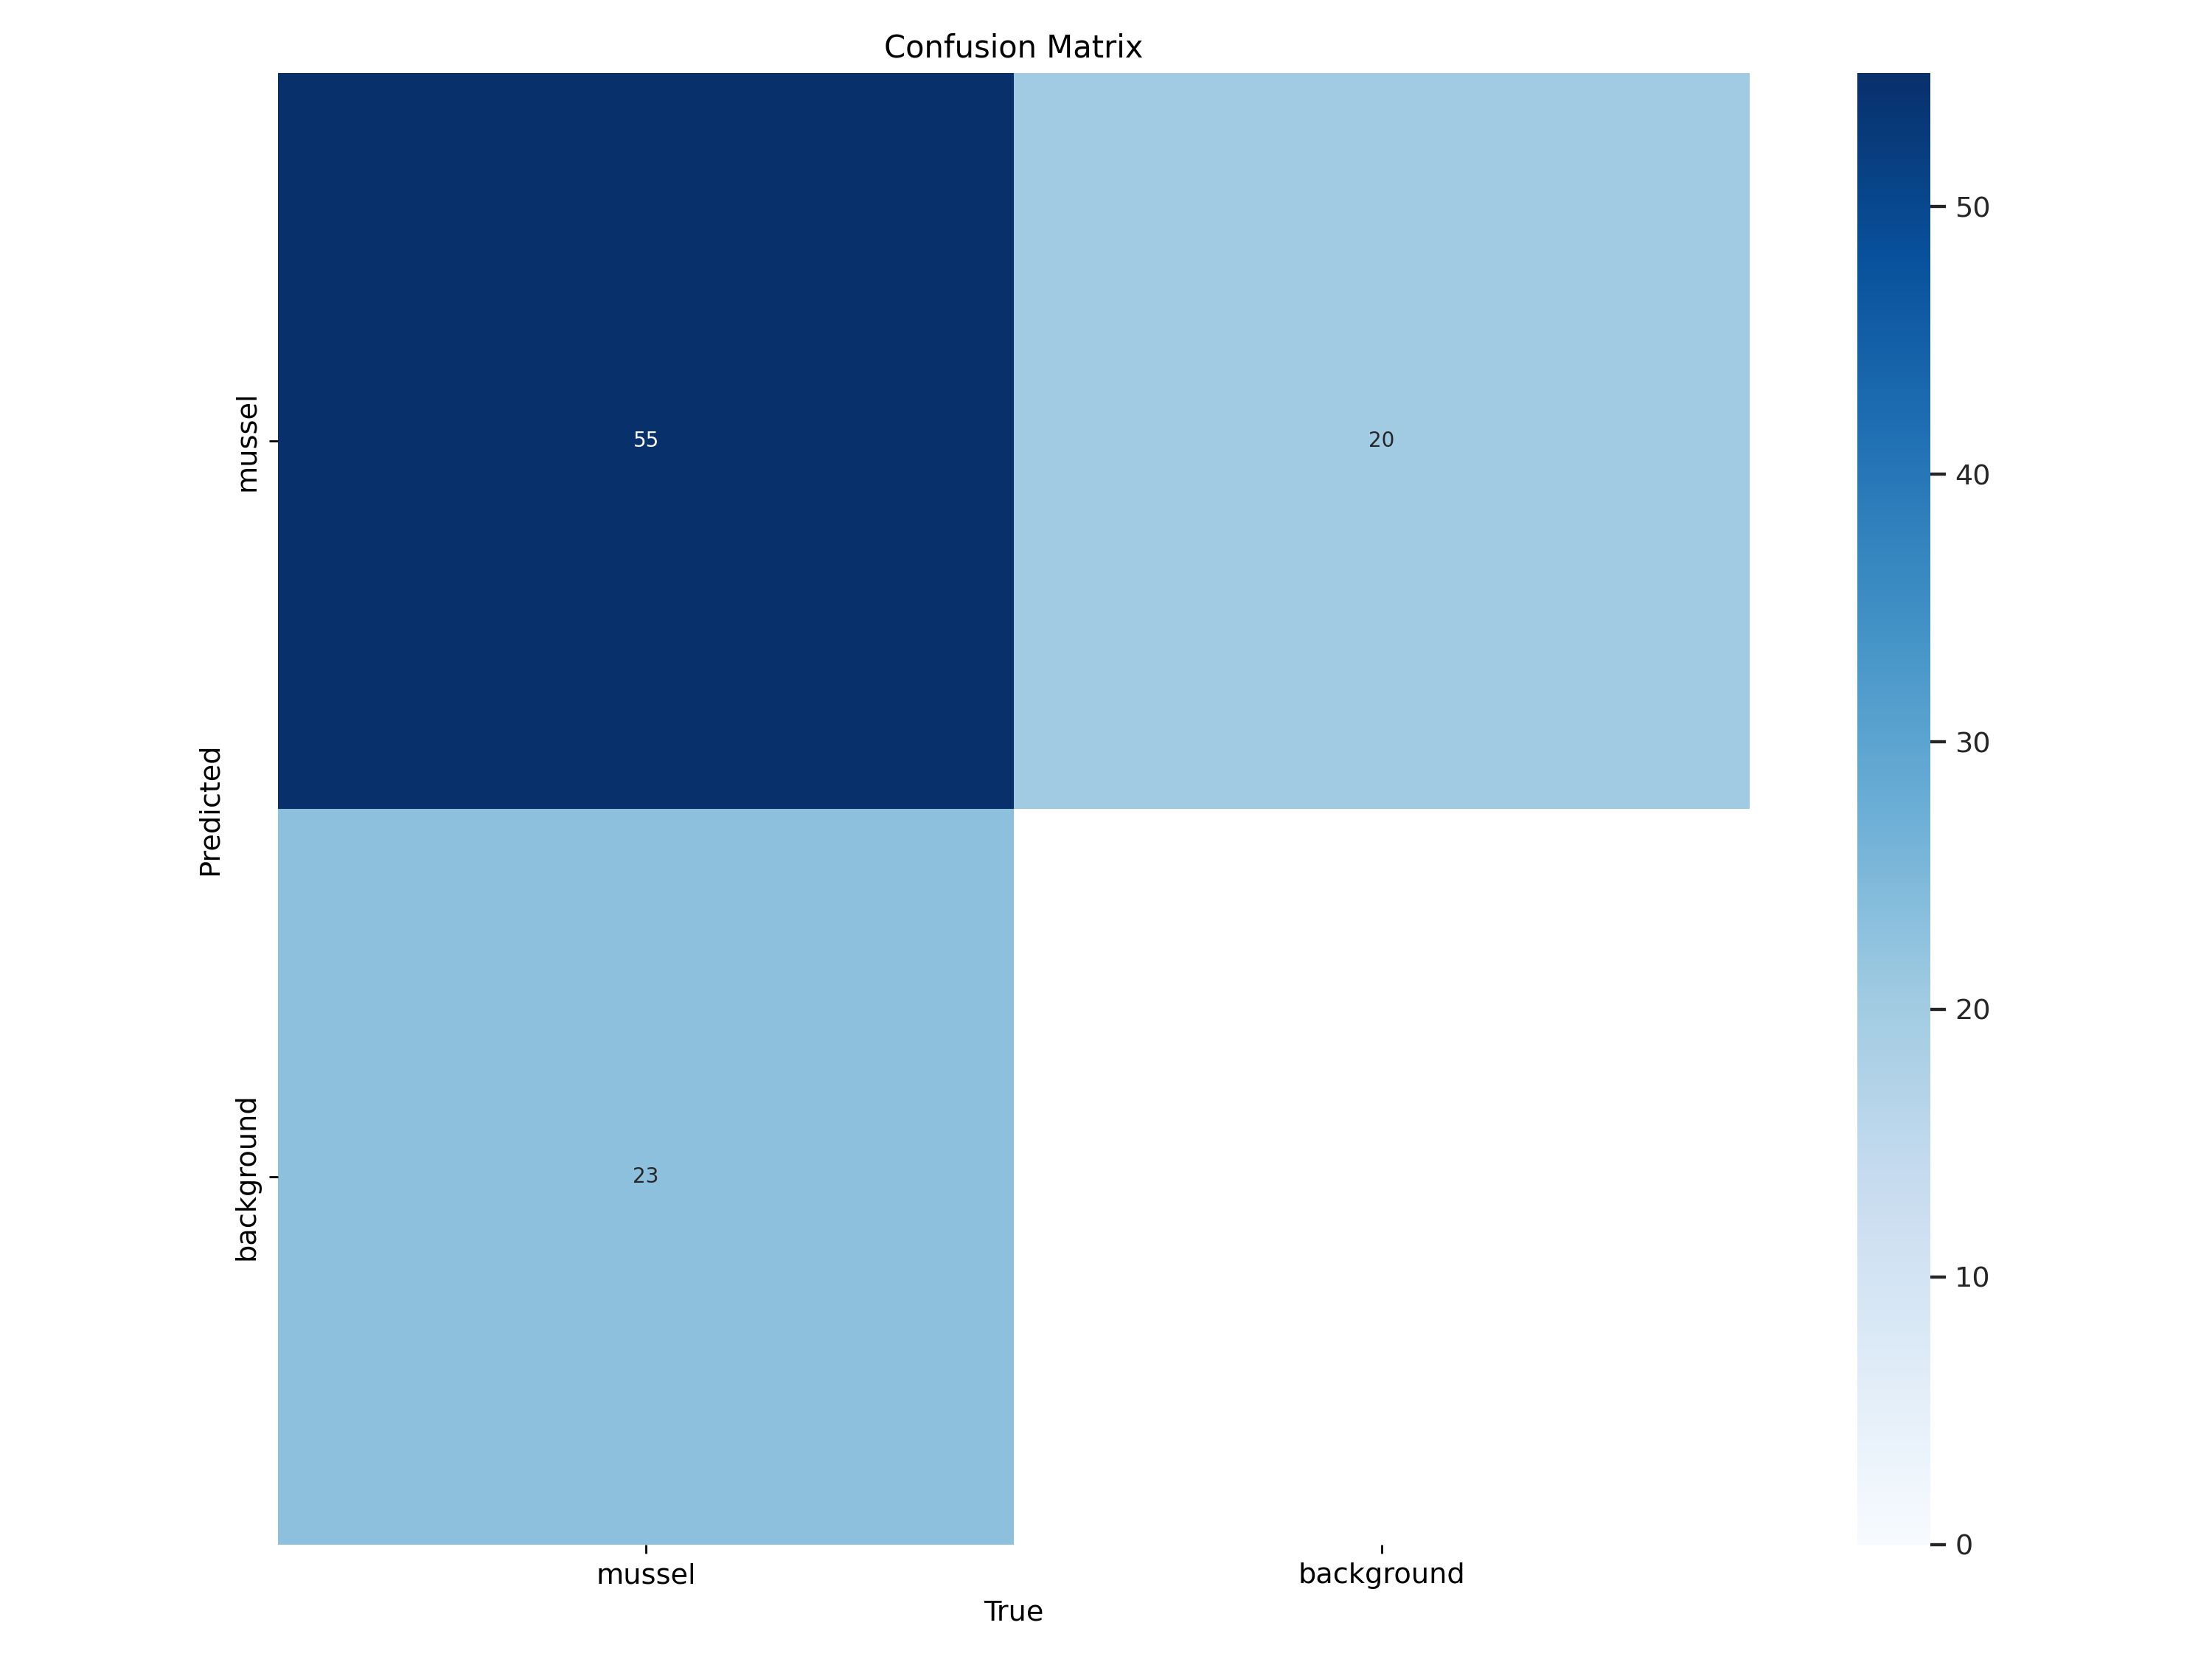

In [4]:
#%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

## Inference

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/44 /content/test1-3/test/images/00G0049572_jpg.rf.44e6a1b59a16213a04d97efe9964887a.jpg: 800x800 1 mussel, 22.5ms
image 2/44 /content/test1-3/test/images/00G0049574_jpg.rf.11760d1e3cfd3d54d776be1eac2a522e.jpg: 800x800 3 mussels, 22.6ms
image 3/44 /content/test1-3/test/images/00G0049580_jpg.rf.fe3fb53bac8ef9f406b4bf351c501618.jpg: 800x800 5 mussels, 22.5ms
image 4/44 /content/test1-3/test/images/00G0049588_jpg.rf.1aea38e586cf644f55e140aadab5675a.jpg: 800x800 (no detections), 22.5ms
image 5/44 /content/test1-3/test/images/00G0049599_jpg.rf.49909a3d79ea878edf66271e334fd481.jpg: 800x800 (no detections), 22.5ms
image 6/44 /content/test1-3/test/images/00G0049609_jpg.rf.fad40ae0a21cccee4c2e1098d2f570cb.jpg: 800x800 2 mussels, 22.6ms
image 7/44 /content/test1-3/test/images/00G0049610_jpg.rf.6e9549863e5e214daf4d

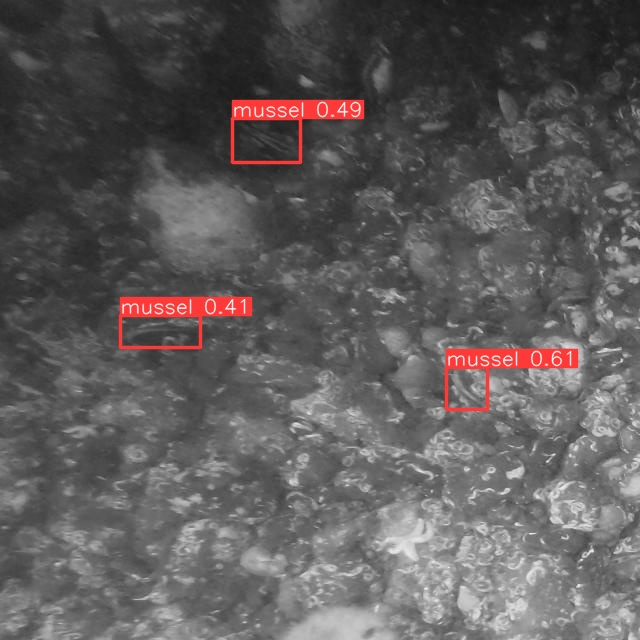

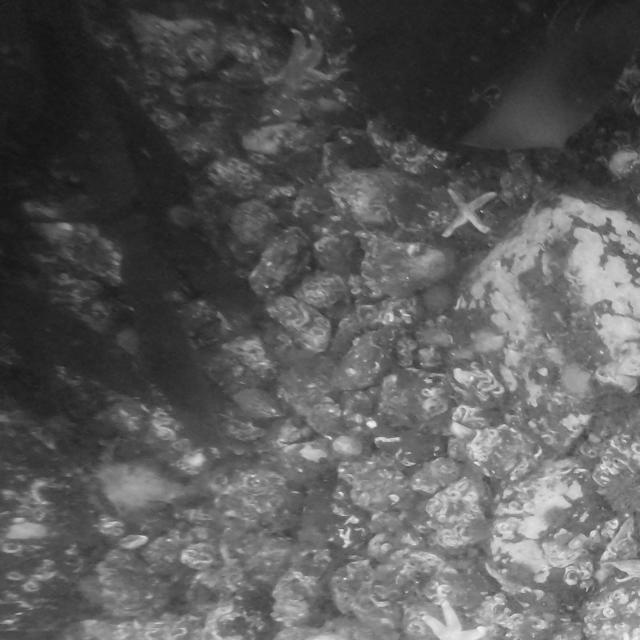

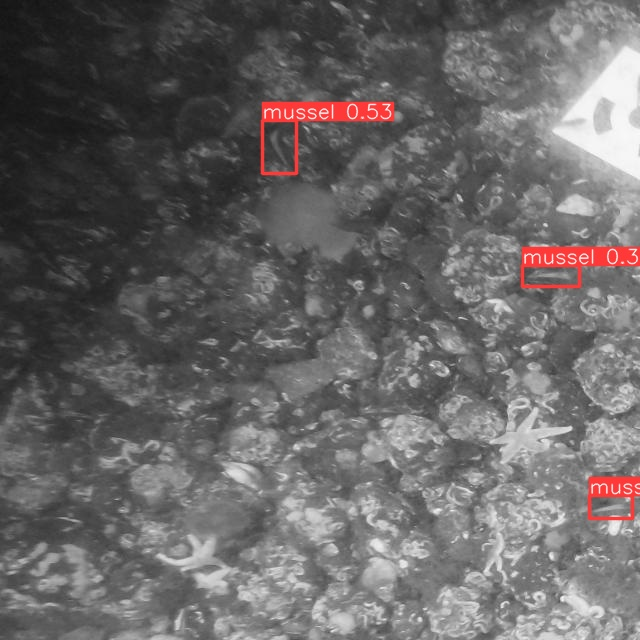

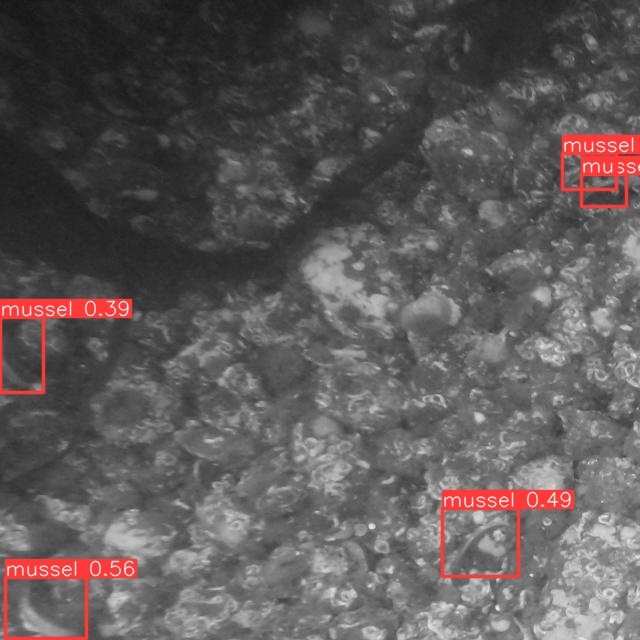

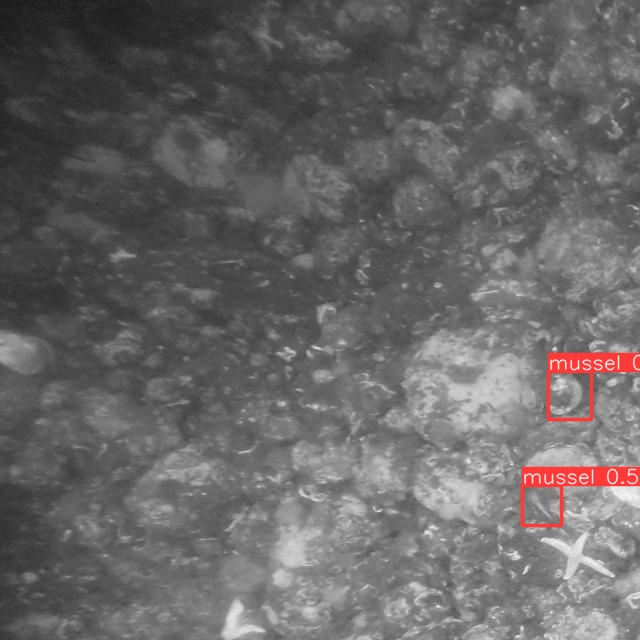

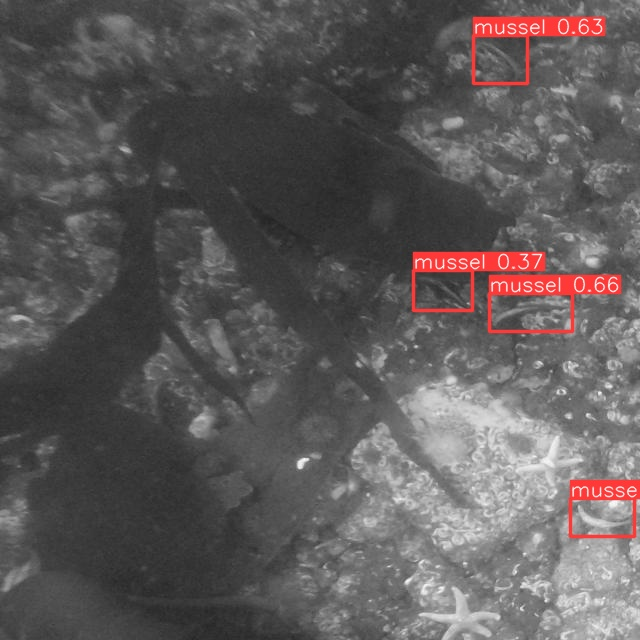

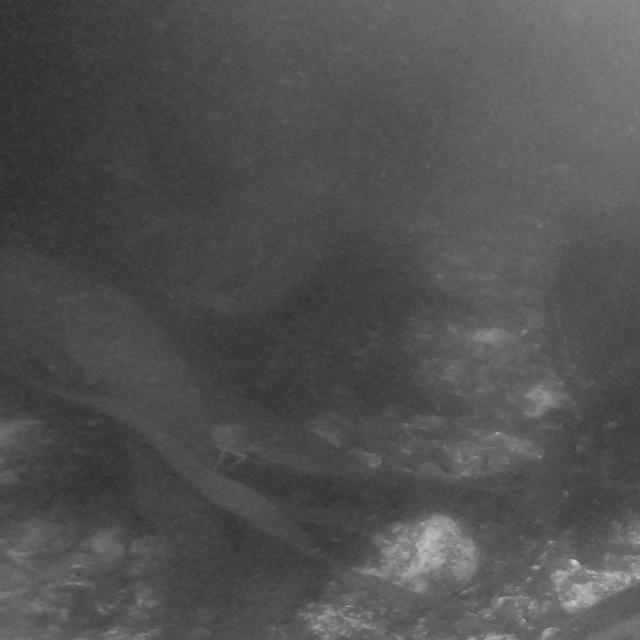

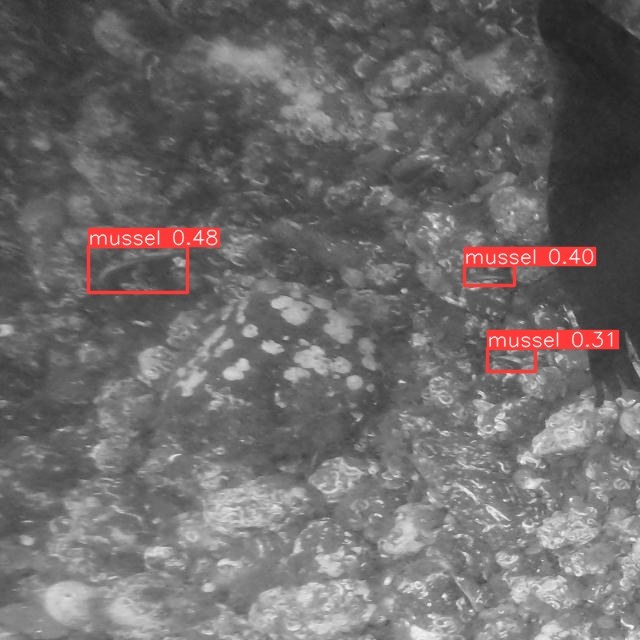

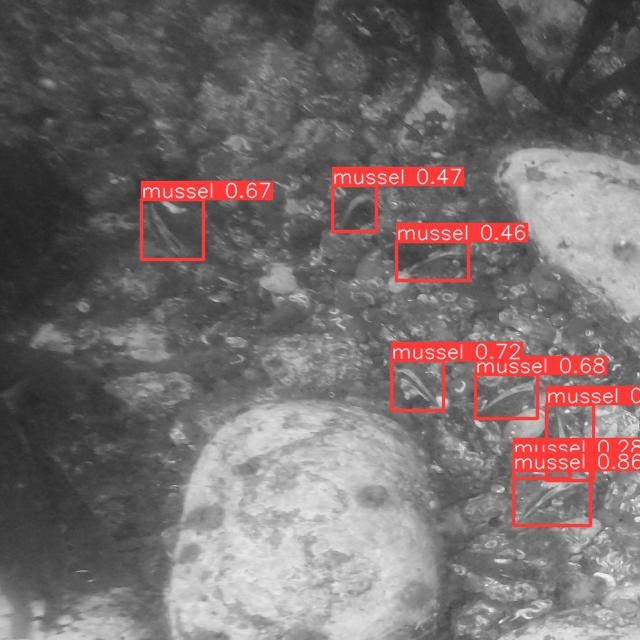

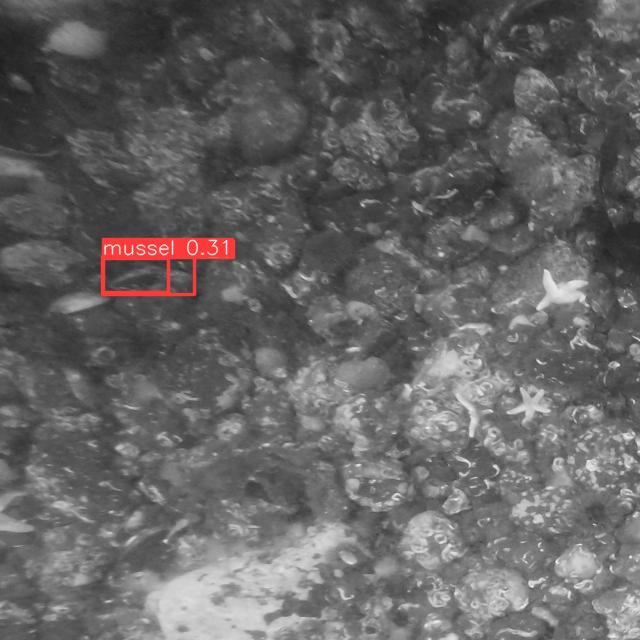

In [5]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True
for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [7]:
!yolo task=detect mode=val split=test model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/test1-3/test/labels... 44 images, 12 backgrounds, 0 corrupt: 100% 44/44 [00:00<00:00, 1335.21it/s]
val: New cache created: /content/test1-3/test/labels.cache
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.31s/it]
                   all         44        101      0.782      0.747      0.777      0.347
Speed: 10.7ms preprocess, 32.5ms inference, 0.0ms loss, 15.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


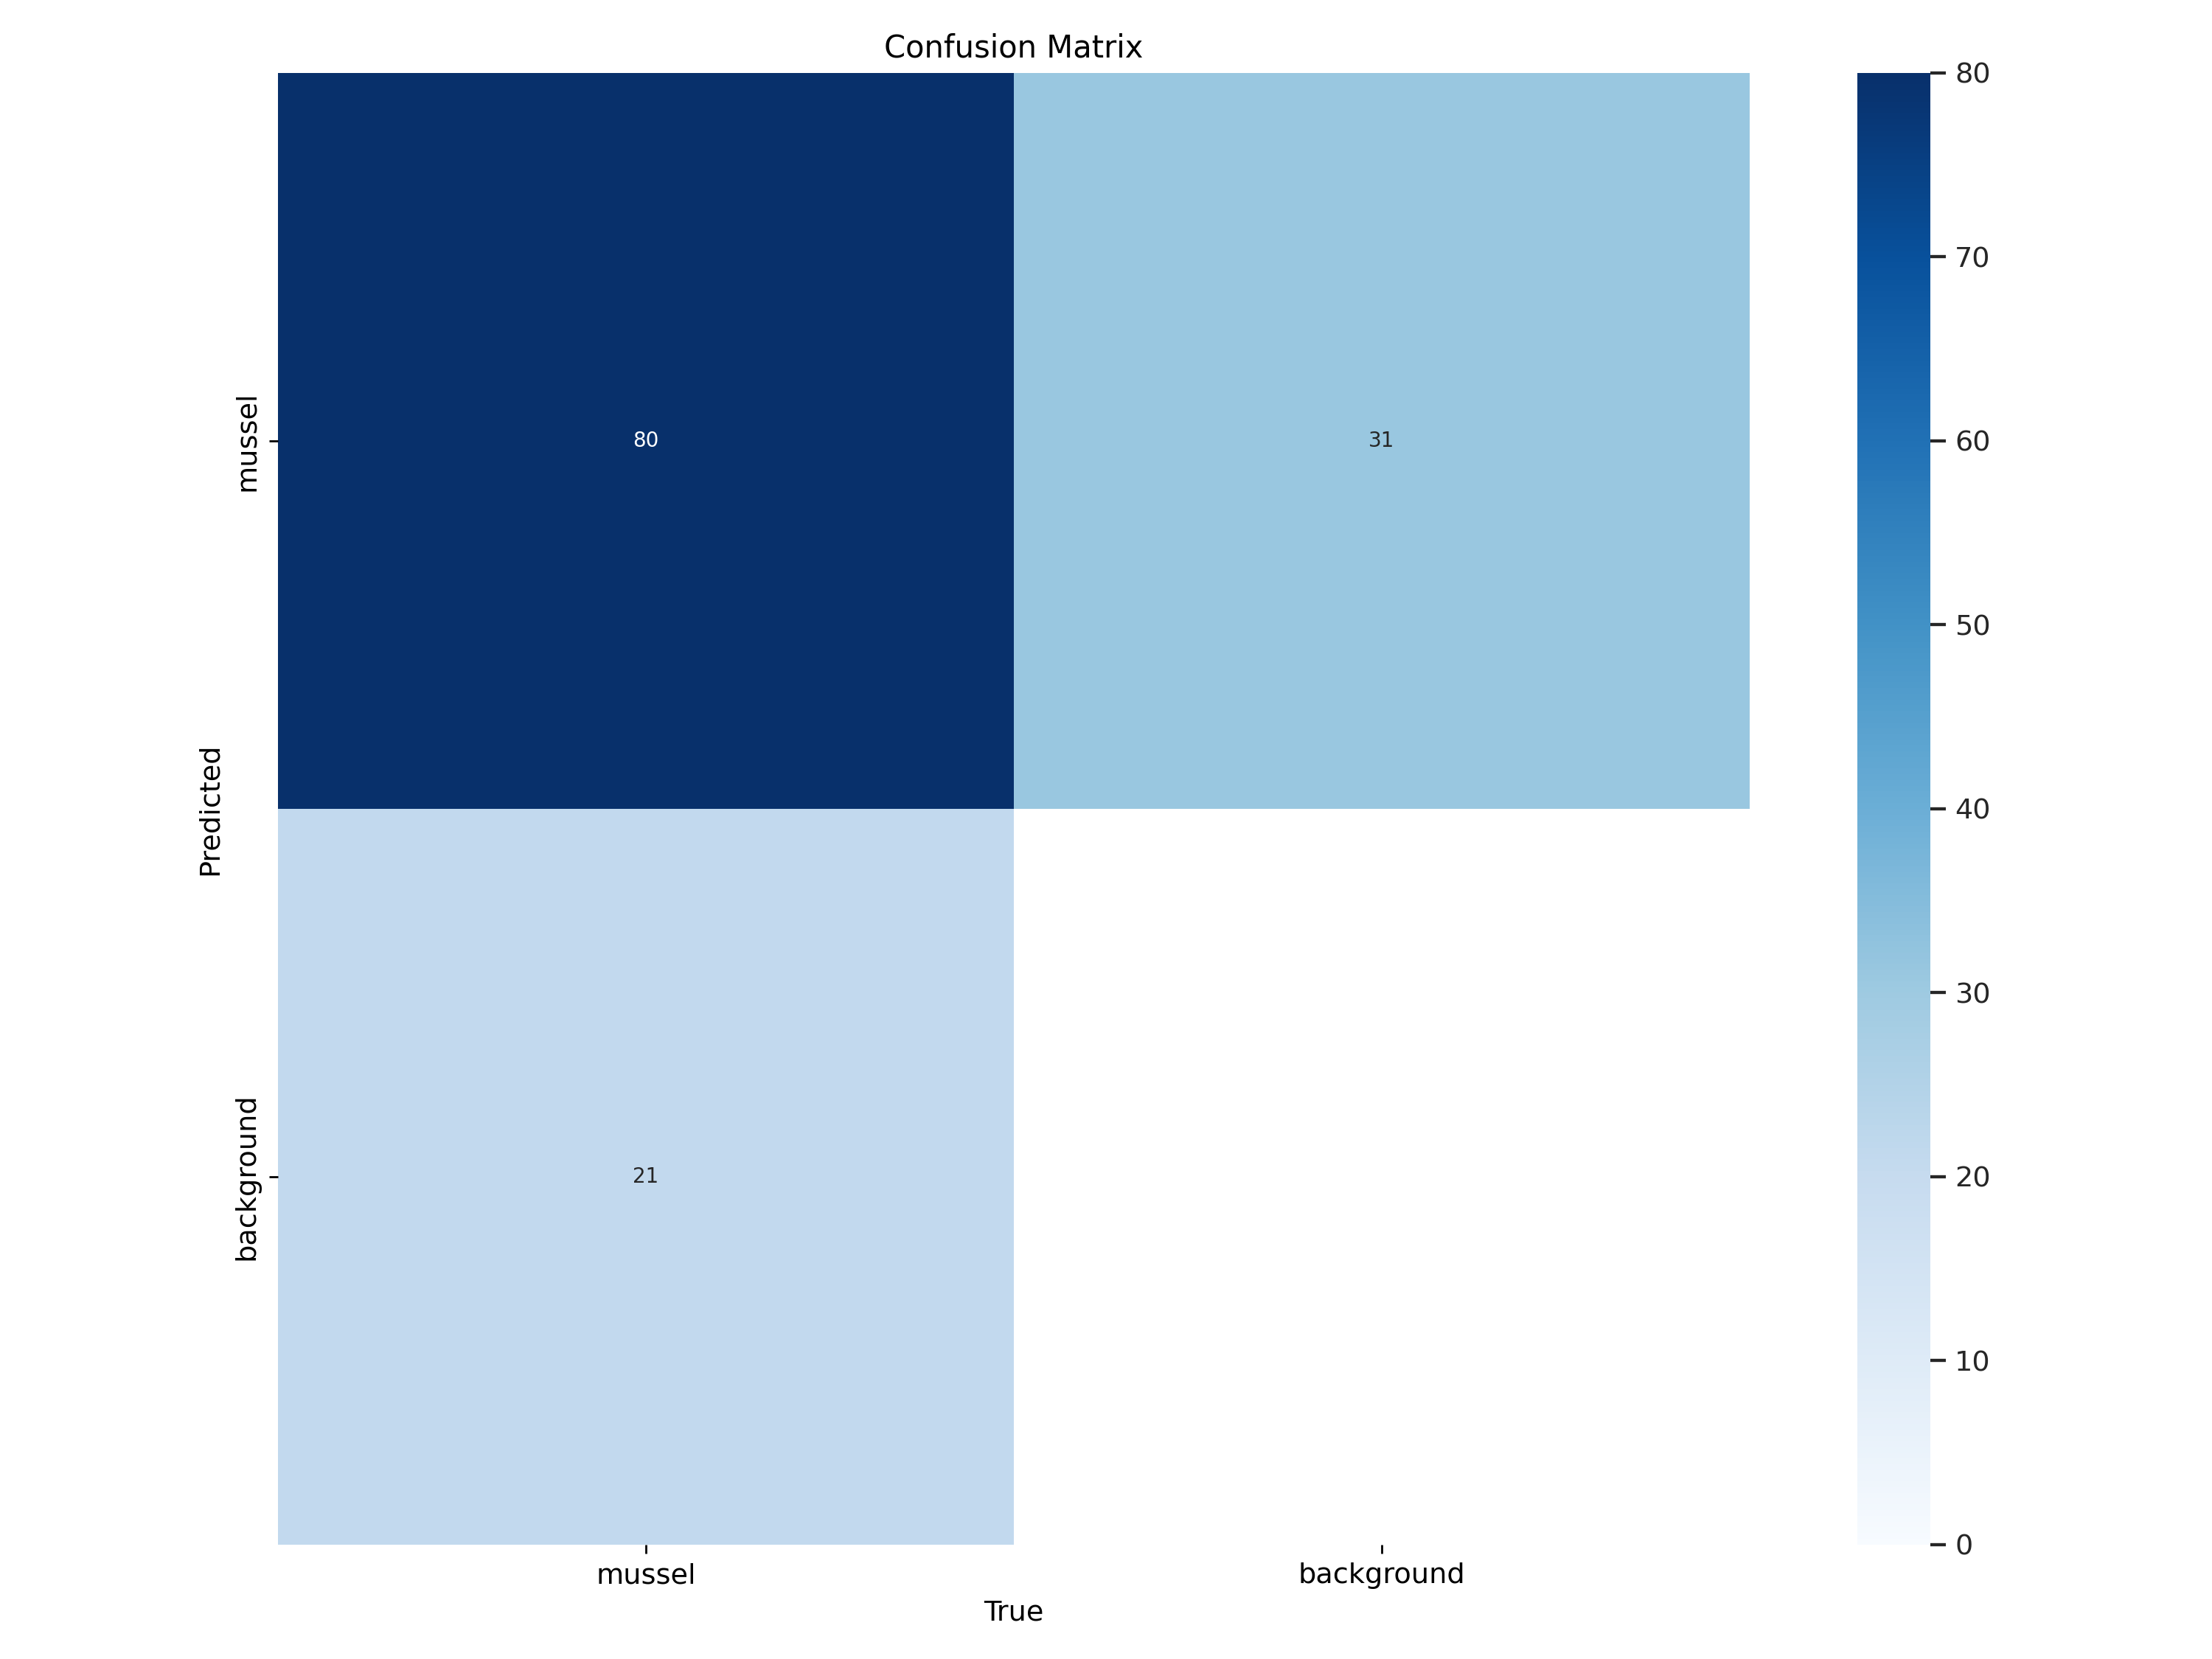

In [8]:
Image(filename=f'{HOME}/runs/detect/val/confusion_matrix.png', width=600)

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!yolo task=detect mode=predict model=./best.pt conf=0.25 source=./gdrive/MyDrive/counts save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/35 /content/gdrive/MyDrive/counts/00.png: 800x640 (no detections), 74.6ms
WARNING ⚠️ NMS time limit 0.550s exceeded
image 2/35 /content/gdrive/MyDrive/counts/01.png: 800x640 1 mussel, 20.2ms
image 3/35 /content/gdrive/MyDrive/counts/02.png: 800x640 4 mussels, 20.1ms
image 4/35 /content/gdrive/MyDrive/counts/03.png: 800x640 (no detections), 20.2ms
image 5/35 /content/gdrive/MyDrive/counts/10.png: 800x640 (no detections), 20.2ms
image 6/35 /content/gdrive/MyDrive/counts/11.png: 800x640 4 mussels, 20.4ms
image 7/35 /content/gdrive/MyDrive/counts/12.png: 800x640 3 mussels, 20.2ms
image 8/35 /content/gdrive/MyDrive/counts/13.png: 800x640 5 mussels, 20.2ms
image 9/35 /content/gdrive/MyDrive/counts/20.png: 800x640 3 mussels, 20.1ms
image 10/35 /content/gdrive/MyDrive/counts/21.png: 800x640 3 mussels, 20.2ms
image 11/3

In [4]:
!zip -r counts.zip runs/detect/predict

  adding: runs/detect/predict/ (stored 0%)
  adding: runs/detect/predict/55.png (deflated 20%)
  adding: runs/detect/predict/65.png (deflated 20%)
  adding: runs/detect/predict/64.png (deflated 22%)
  adding: runs/detect/predict/43.png (deflated 19%)
  adding: runs/detect/predict/62.png (deflated 21%)
  adding: runs/detect/predict/71.png (deflated 20%)
  adding: runs/detect/predict/21.png (deflated 21%)
  adding: runs/detect/predict/02.png (deflated 21%)
  adding: runs/detect/predict/00.png (deflated 21%)
  adding: runs/detect/predict/42.png (deflated 20%)
  adding: runs/detect/predict/50.png (deflated 19%)
  adding: runs/detect/predict/01.png (deflated 21%)
  adding: runs/detect/predict/61.png (deflated 20%)
  adding: runs/detect/predict/12.png (deflated 21%)
  adding: runs/detect/predict/03.png (deflated 21%)
  adding: runs/detect/predict/23.png (deflated 21%)
  adding: runs/detect/predict/52.png (deflated 21%)
  adding: runs/detect/predict/11.png (deflated 21%)
  adding: runs/detect